In [1]:
%cd ..

/home/juanhevia/IDIL


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pickle as pkl
import generate_trajectories as traj_utils
import utils as nb_utils
from collections import defaultdict

pygame 2.6.0 (SDL 2.28.4, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import importlib
import scipy.stats as stats

In [4]:
importlib.reload(nb_utils)

<module 'utils' from '/home/juanhevia/IDIL/notebooks/utils.py'>

In [5]:
RUNS = [
"es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809",
"es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809",
"es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809",
"es-100-01J4XFW8RHVVYCTJ5Y3C2BTBF9-synth_extra_trajs-0809",
"es-100-01J4XD2HX2Y2FBMBEWEE6RGH40-synth_extra_trajs-0809",
"es-60-01J4XA99JZKFM2DW2EEA0XSZK7-synth_extra_trajs-0809",
"es-60-01J4X7FCX4VVR4C8QJ01PCR57Q-synth_extra_trajs-0809",
"es-60-01J4X4MRGFV2KTEQJW4GNMQKXS-synth_extra_trajs-0809",
"es-60-01J4X1WBK8J8F3XXHZBVQSGMP2-synth_extra_trajs-0809",
"es-60-01J4WYYDPHHAGRHK4Q4TS1GM0Y-synth_extra_trajs-0809",
"es-20-01J4WW1WMZN9APJJ8NF115HQDC-synth_extra_trajs-0809",
"es-20-01J4WS66ZBGJCDXQ4QTE33S2HX-synth_extra_trajs-0809",
"es-20-01J4WP99BEQC5G4DNBK4S7RYXQ-synth_extra_trajs-0809",
"es-20-01J4WKD4YREQT0RPPCFVT3BFSA-synth_extra_trajs-0809",
"es-20-01J4WGGVYCEYXKM7DZ1TQT2KFQ-synth_extra_trajs-0809",
"es-0-01J4WDKJRBQJA5TRN78KD9V55P-synth_extra_trajs-0809",
"es-0-01J4W9R49RKQ9060E1VBXGY6XF-synth_extra_trajs-0809",
"es-0-01J4W6Y6HFM2JA6YMBZVC3B9YA-synth_extra_trajs-0809",
"es-0-01J4W44NBPQP04TMKJQZ9FK38G-synth_extra_trajs-0809",
"es-0-01J4W1ANG5AXDA4SZSPHKH12J3-synth_extra_trajs-0809",
]

ENV_NAME = "CleanupSingle-v0"

In [6]:
agents = nb_utils.get_trained_models(runs=RUNS, env_name=ENV_NAME)

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_pi
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_pi
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809/2024-08-10_02-21-57/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR

In [7]:
trajectories = nb_utils.get_agent_trajectories(runs=RUNS, env_name=ENV_NAME, num_trajectories=10)

  0%|          | 0/20 [00:00<?, ?it/s]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XR6C47AKQ5KNJWNR679E8R-synth_extra_trajs-0809/2024-08-10_03-59-01/model/iq_CleanupSingle-v0_n70_l70_best_pi


  5%|▌         | 1/20 [00:03<01:06,  3.50s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XNDCER2DMYYRXEJZXJ2271-synth_extra_trajs-0809/2024-08-10_03-10-25/model/iq_CleanupSingle-v0_n70_l70_best_pi


 10%|█         | 2/20 [00:05<00:51,  2.88s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809/2024-08-10_02-21-57/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XJMMP9N8S3TQN4SESDZCTR-synth_extra_trajs-0809/2024-08-10_02-21-57/model/iq_CleanupSingle-v0_n70_l70_best_pi


 15%|█▌        | 3/20 [00:08<00:43,  2.55s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XFW8RHVVYCTJ5Y3C2BTBF9-synth_extra_trajs-0809/2024-08-10_01-33-41/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XFW8RHVVYCTJ5Y3C2BTBF9-synth_extra_trajs-0809/2024-08-10_01-33-41/model/iq_CleanupSingle-v0_n70_l70_best_pi


 20%|██        | 4/20 [00:10<00:42,  2.67s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XD2HX2Y2FBMBEWEE6RGH40-synth_extra_trajs-0809/2024-08-10_00-44-41/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J4XD2HX2Y2FBMBEWEE6RGH40-synth_extra_trajs-0809/2024-08-10_00-44-41/model/iq_CleanupSingle-v0_n70_l70_best_pi


 20%|██        | 4/20 [00:11<00:45,  2.83s/it]


KeyboardInterrupt: 

In [ ]:
cum_rewards = nb_utils.get_cumulative_rewards(trajectories, agents)

There are 4 kvals
Each kval has 50 cum_rewards, matching the 5 x 10 trajectories generated for each agent (using key = 100)


(-100.0, -10.0)

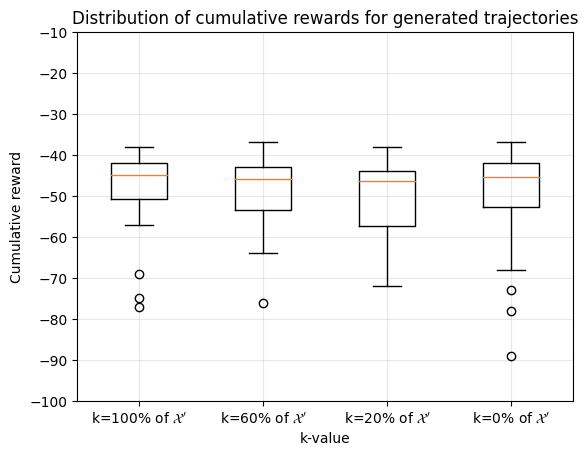

In [ ]:
nb_utils.plot_cum_rewards(cum_rewards)
plt.gca().set_ylim([-100, -10])

In [ ]:
pd.DataFrame(cum_rewards).describe()

,100,60,20,0
count,50.00000,50.00000,50.000000,50.000000
mean,-56.32000,-51.88000,-60.280000,-57.260000
std,37.59366,21.33182,39.457567,37.887486
min,-200.00000,-174.00000,-200.000000,-200.000000
25%,-50.75000,-53.50000,-57.250000,-52.750000
50%,-45.00000,-46.00000,-46.500000,-45.500000
75%,-42.00000,-43.00000,-44.000000,-42.000000
max,-38.00000,-37.00000,-38.000000,-37.000000


## evaluate mean differences between K values

In [ ]:
test_baseline = 0
test_kvals = [20, 60, 100]

for k in test_kvals:
    print(f"K = {k}")
    res = stats.ttest_ind(cum_rewards[test_baseline], cum_rewards[k], equal_var=False)
    print(res)
    if res.pvalue < 0.05:
        print("Significant")
    else:
        print("Not significant")

    print("---" * 4)

K = 20
Ttest_indResult(statistic=0.39037764148960985, pvalue=0.6971059670652483)
Not significant
------------
K = 60
Ttest_indResult(statistic=-0.8749394510701033, pvalue=0.384319779513428)
Not significant
------------
K = 100
Ttest_indResult(statistic=-0.12453346602367504, pvalue=0.9011480072766609)
Not significant
------------


# Evaluate on test data

In [ ]:
# load test data for CleanupSingle-v0
# load test data
import os

with open(os.path.join("idil_train", "test_data", "CleanupSingle-v0_50-TEST.pkl"), "rb") as f:
    test_data = pkl.load(f)

In [ ]:
accs_by_k = nb_utils.compute_accuracy_by_kval(test_data=test_data, agents=agents)

50it [00:08,  5.83it/s]


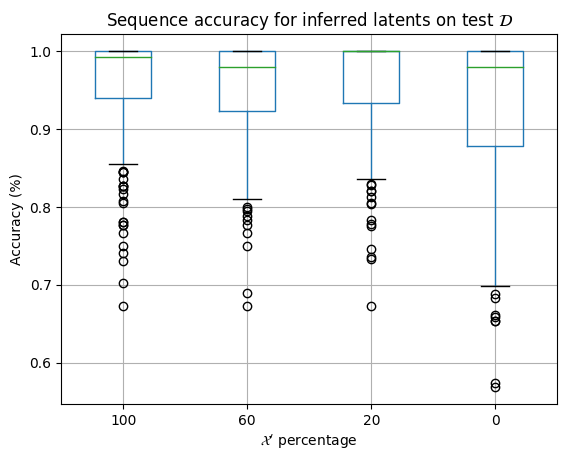

In [ ]:
nb_utils.plot_sequence_accuracy_boxplot(accs_by_k)

In [ ]:
pd.DataFrame(accs_by_k).describe()

,100,60,20,0
count,250.000000,250.000000,250.000000,250.000000
mean,0.960407,0.952086,0.957714,0.929977
std,0.063340,0.063372,0.064906,0.096606
min,0.672131,0.673077,0.673077,0.568966
25%,0.938776,0.923077,0.933333,0.877675
50%,0.991525,0.978723,1.000000,0.979158
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_baseline = 0
test_kvals = [20, 60, 100]

for k in test_kvals:
    print(f"K = {k}")
    res = stats.ttest_ind(accs_by_k[test_baseline], accs_by_k[k], equal_var=False)
    print(res)
    if res.pvalue < 0.05:
        print("Significant")
    else:
        print("Not significant")

    print("---" * 4)

K = 20
Ttest_indResult(statistic=-3.768063001800442, pvalue=0.0001871487489721436)
Significant
------------
K = 60
Ttest_indResult(statistic=-3.0255954716295084, pvalue=0.0026304068846197443)
Significant
------------
K = 100
Ttest_indResult(statistic=-4.164914286630631, pvalue=3.7660245210506694e-05)
Significant
------------


# Evaluate `fixed_pi` models

In [17]:
RUNS = [
"es-100-01J50HYWVA9B1VKTJ3Z1Q59ZG9-synth_extra_trajs-fixedpi-0810",
"es-100-01J50FYKH42PXN6JGMP4PV3Z9W-synth_extra_trajs-fixedpi-0810",
"es-100-01J50DYTWZ1D3Q4PFKE6VHN54M-synth_extra_trajs-fixedpi-0810",
"es-100-01J50BZ12TGCPCAFBGQD3DAH9A-synth_extra_trajs-fixedpi-0810",
"es-100-01J50A0HH3JC5EB39KEAKF61QR-synth_extra_trajs-fixedpi-0810",
"es-60-01J5081T4SPE48MV40K1W3495A-synth_extra_trajs-fixedpi-0810",
"es-60-01J5063CG8MZMTKJYDP9C7K7AW-synth_extra_trajs-fixedpi-0810",
"es-60-01J50441MDA9JSTSETH5AGNEBW-synth_extra_trajs-fixedpi-0810",
"es-60-01J5025B59AQHG6VXN5BZDFCW1-synth_extra_trajs-fixedpi-0810",
"es-60-01J5005X7E5HSTPSJ4K7S38Z3J-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZY79P0D0WKME7MEKMSNZFE-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZW7YQ0GEQSF4C0K3JS29TW-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZT8FSGZNZM5FA64DR61W8R-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZR9R661ATZJRNBHM3EFTW1-synth_extra_trajs-fixedpi-0810",
"es-20-01J4ZPAF1W7FSYYZ4YPC74PSRR-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZMCF4YE5GYMVG3XBAWZ70A-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZJE2CRGHDXKR5MEF0M709G-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZGE3N4HV2XMP9NEY8B3A7X-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZEE268ZTT50GR19M68JQNC-synth_extra_trajs-fixedpi-0810",
"es-0-01J4ZCDQKQ0GMHVGPWB3041F4E-synth_extra_trajs-fixedpi-0810",
]

In [18]:
from idil_algs.baselines.IQLearn.dataset.expert_dataset import ExpertDataset
import os

expert_dataset = ExpertDataset(os.path.join("idil_train","extra_trajectories/CleanupSingle-v0_500-EXPERT-DIST.pkl"))

In [19]:
importlib.reload(nb_utils)

<module 'utils' from '/home/juanhevia/IDIL/notebooks/utils.py'>

In [20]:
importlib.reload(traj_utils)

<module 'generate_trajectories' from '/home/juanhevia/IDIL/notebooks/generate_trajectories.py'>

In [21]:
agents_fixed_pi = nb_utils.get_trained_models(runs=RUNS, env_name=ENV_NAME, 
                                              load_micro=False, expert_dataset=expert_dataset)
trajectories_fixed_pi = nb_utils.get_agent_trajectories(runs=RUNS, env_name=ENV_NAME, num_trajectories=10, 
                                                        load_micro=False, expert_dataset=expert_dataset)

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50HYWVA9B1VKTJ3Z1Q59ZG9-synth_extra_trajs-fixedpi-0810/2024-08-11_06-07-47/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50FYKH42PXN6JGMP4PV3Z9W-synth_extra_trajs-fixedpi-0810/2024-08-11_05-32-41/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50DYTWZ1D3Q4PFKE6VHN54M-synth_extra_trajs-fixedpi-0810/2024-08-11_04-57-51/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50BZ12TGCPCAFBGQD3DAH9A-synth_extra_trajs-fixedpi-0810/2024-08-11_04-23-00/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50A0HH3JC5EB39KEAKF61QR-synth_extra_trajs-fixedpi-0810/2024-08-11_03-48-53/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v

  0%|          | 0/20 [00:00<?, ?it/s]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50HYWVA9B1VKTJ3Z1Q59ZG9-synth_extra_trajs-fixedpi-0810/2024-08-11_06-07-47/model/iq_CleanupSingle-v0_n70_l70_best_tx


  5%|▌         | 1/20 [00:05<01:36,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50FYKH42PXN6JGMP4PV3Z9W-synth_extra_trajs-fixedpi-0810/2024-08-11_05-32-41/model/iq_CleanupSingle-v0_n70_l70_best_tx


 10%|█         | 2/20 [00:10<01:31,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50DYTWZ1D3Q4PFKE6VHN54M-synth_extra_trajs-fixedpi-0810/2024-08-11_04-57-51/model/iq_CleanupSingle-v0_n70_l70_best_tx


 15%|█▌        | 3/20 [00:15<01:25,  5.05s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50BZ12TGCPCAFBGQD3DAH9A-synth_extra_trajs-fixedpi-0810/2024-08-11_04-23-00/model/iq_CleanupSingle-v0_n70_l70_best_tx


 20%|██        | 4/20 [00:20<01:21,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-100-01J50A0HH3JC5EB39KEAKF61QR-synth_extra_trajs-fixedpi-0810/2024-08-11_03-48-53/model/iq_CleanupSingle-v0_n70_l70_best_tx


 25%|██▌       | 5/20 [00:25<01:15,  5.06s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5081T4SPE48MV40K1W3495A-synth_extra_trajs-fixedpi-0810/2024-08-11_03-14-37/model/iq_CleanupSingle-v0_n70_l70_best_tx


 30%|███       | 6/20 [00:30<01:10,  5.06s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5063CG8MZMTKJYDP9C7K7AW-synth_extra_trajs-fixedpi-0810/2024-08-11_02-40-32/model/iq_CleanupSingle-v0_n70_l70_best_tx


 35%|███▌      | 7/20 [00:35<01:05,  5.07s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J50441MDA9JSTSETH5AGNEBW-synth_extra_trajs-fixedpi-0810/2024-08-11_02-05-56/model/iq_CleanupSingle-v0_n70_l70_best_tx


 40%|████      | 8/20 [00:40<01:00,  5.06s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5025B59AQHG6VXN5BZDFCW1-synth_extra_trajs-fixedpi-0810/2024-08-11_01-31-41/model/iq_CleanupSingle-v0_n70_l70_best_tx


 45%|████▌     | 9/20 [00:45<00:55,  5.05s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-60-01J5005X7E5HSTPSJ4K7S38Z3J-synth_extra_trajs-fixedpi-0810/2024-08-11_00-57-03/model/iq_CleanupSingle-v0_n70_l70_best_tx


 50%|█████     | 10/20 [00:50<00:50,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZY79P0D0WKME7MEKMSNZFE-synth_extra_trajs-fixedpi-0810/2024-08-11_00-22-51/model/iq_CleanupSingle-v0_n70_l70_best_tx


 55%|█████▌    | 11/20 [00:55<00:45,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZW7YQ0GEQSF4C0K3JS29TW-synth_extra_trajs-fixedpi-0810/2024-08-10_23-48-16/model/iq_CleanupSingle-v0_n70_l70_best_tx


 60%|██████    | 12/20 [01:00<00:40,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZT8FSGZNZM5FA64DR61W8R-synth_extra_trajs-fixedpi-0810/2024-08-10_23-13-36/model/iq_CleanupSingle-v0_n70_l70_best_tx


 65%|██████▌   | 13/20 [01:05<00:35,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZR9R661ATZJRNBHM3EFTW1-synth_extra_trajs-fixedpi-0810/2024-08-10_22-39-20/model/iq_CleanupSingle-v0_n70_l70_best_tx


 70%|███████   | 14/20 [01:10<00:30,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-20-01J4ZPAF1W7FSYYZ4YPC74PSRR-synth_extra_trajs-fixedpi-0810/2024-08-10_22-04-46/model/iq_CleanupSingle-v0_n70_l70_best_tx


 75%|███████▌  | 15/20 [01:15<00:25,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZMCF4YE5GYMVG3XBAWZ70A-synth_extra_trajs-fixedpi-0810/2024-08-10_21-30-55/model/iq_CleanupSingle-v0_n70_l70_best_tx


 80%|████████  | 16/20 [01:20<00:20,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZJE2CRGHDXKR5MEF0M709G-synth_extra_trajs-fixedpi-0810/2024-08-10_20-56-50/model/iq_CleanupSingle-v0_n70_l70_best_tx


 85%|████████▌ | 17/20 [01:25<00:15,  5.04s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZGE3N4HV2XMP9NEY8B3A7X-synth_extra_trajs-fixedpi-0810/2024-08-10_20-21-54/model/iq_CleanupSingle-v0_n70_l70_best_tx


 90%|█████████ | 18/20 [01:30<00:10,  5.05s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZEE268ZTT50GR19M68JQNC-synth_extra_trajs-fixedpi-0810/2024-08-10_19-46-56/model/iq_CleanupSingle-v0_n70_l70_best_tx


 95%|█████████▌| 19/20 [01:35<00:05,  5.05s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J4ZCDQKQ0GMHVGPWB3041F4E-synth_extra_trajs-fixedpi-0810/2024-08-10_19-11-48/model/iq_CleanupSingle-v0_n70_l70_best_tx


100%|██████████| 20/20 [01:41<00:00,  5.05s/it]


There are 4 kvals
Each kval has 50 cum_rewards, matching the 5 x 10 trajectories generated for each agent (using key = 100)


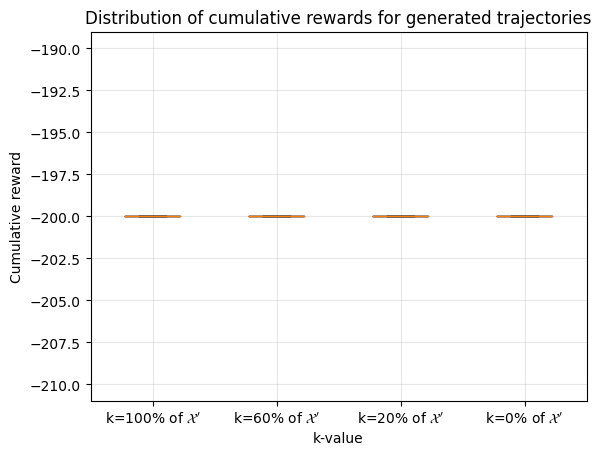

In [63]:
cum_rewards_fixed_pi = nb_utils.get_cumulative_rewards(trajectories_fixed_pi, agents_fixed_pi)
nb_utils.plot_cum_rewards(cum_rewards_fixed_pi)
# plt.gca().set_ylim([-100, -10])

In [67]:
trajectories_fixed_pi[0][0]['rewards'][0]

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [60]:
pd.DataFrame(cum_rewards_fixed_pi).describe()

,100,60,20,0
count,50.0,50.0,50.0,50.0
mean,-200.0,-200.0,-200.0,-200.0
std,0.0,0.0,0.0,0.0
min,-200.0,-200.0,-200.0,-200.0
25%,-200.0,-200.0,-200.0,-200.0
50%,-200.0,-200.0,-200.0,-200.0
75%,-200.0,-200.0,-200.0,-200.0
max,-200.0,-200.0,-200.0,-200.0


In [21]:
accs_by_k_fixed_pi = nb_utils.compute_accuracy_by_kval(test_data=test_data, agents=agents_fixed_pi)

50it [00:08,  6.22it/s]


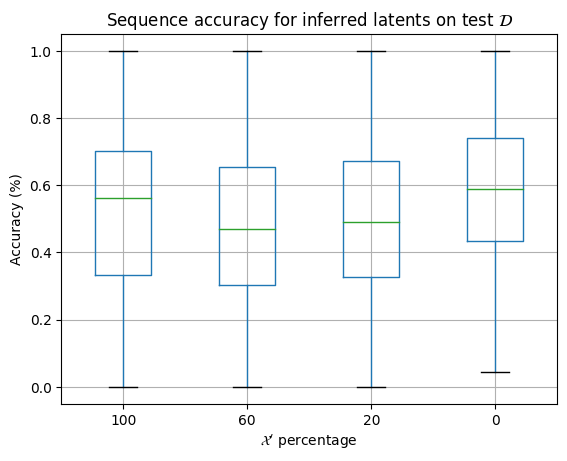

In [33]:
nb_utils.plot_sequence_accuracy_boxplot(accs_by_k_fixed_pi)

In [23]:
pd.DataFrame(accs_by_k_fixed_pi).describe()

,100,60,20,0
count,250.000000,250.000000,250.000000,250.000000
mean,0.528204,0.468221,0.500402,0.581118
std,0.236021,0.231161,0.228577,0.222254
min,0.000000,0.000000,0.000000,0.043478
25%,0.333333,0.302637,0.326198,0.432559
50%,0.560488,0.469337,0.489996,0.588235
75%,0.702128,0.655172,0.670977,0.740338
max,1.000000,1.000000,1.000000,1.000000


## why the weird `reward` distribution?

In [50]:
agents_fixed_pi[20][0].pi_agent

# Evaluate `randomized` models

In [17]:
RUNS = [
"es-0-01J53TSKK0RB81XFWG2BZ4CHP7-extra_synth_traj-bm_randomize-nofep-0812",
"es-0-01J53QZVQ1KS7SSNMNAXRAZTEE-extra_synth_traj-bm_randomize-nofep-0812",
"es-0-01J53N53F267FQQB9YDGQVMJV8-extra_synth_traj-bm_randomize-nofep-0812",
"es-0-01J53J7CGEKC5H83HMNXTQ4C09-extra_synth_traj-bm_randomize-nofep-0812",
]

In [18]:
from idil_algs.baselines.IQLearn.dataset.expert_dataset import ExpertDataset
import os

expert_dataset = ExpertDataset(os.path.join("idil_train","extra_trajectories/CleanupSingle-v0_500-EXPERT-DIST.pkl"))

In [22]:
importlib.reload(nb_utils)
importlib.reload(traj_utils)

<module 'generate_trajectories' from '/home/juanhevia/IDIL/notebooks/generate_trajectories.py'>

In [19]:
agents_control = nb_utils.get_trained_models(runs=RUNS, env_name=ENV_NAME, load_micro=True)
trajectories_control = nb_utils.get_agent_trajectories(runs=RUNS, env_name=ENV_NAME, num_trajectories=10, load_micro=True)

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53TSKK0RB81XFWG2BZ4CHP7-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_12-39-55/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53TSKK0RB81XFWG2BZ4CHP7-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_12-39-55/model/iq_CleanupSingle-v0_n70_l70_best_pi
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53QZVQ1KS7SSNMNAXRAZTEE-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-50-54/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53QZVQ1KS7SSNMNAXRAZTEE-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-50-54/model/iq_CleanupSingle-v0_n70_l70_best_pi
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53N53F267FQQB9YDGQVMJV8-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-01-20/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models 

  0%|          | 0/4 [00:00<?, ?it/s]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53TSKK0RB81XFWG2BZ4CHP7-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_12-39-55/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53TSKK0RB81XFWG2BZ4CHP7-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_12-39-55/model/iq_CleanupSingle-v0_n70_l70_best_pi


 25%|██▌       | 1/4 [00:02<00:08,  2.75s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53QZVQ1KS7SSNMNAXRAZTEE-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-50-54/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53QZVQ1KS7SSNMNAXRAZTEE-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-50-54/model/iq_CleanupSingle-v0_n70_l70_best_pi


 50%|█████     | 2/4 [00:05<00:05,  2.55s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53N53F267FQQB9YDGQVMJV8-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-01-20/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53N53F267FQQB9YDGQVMJV8-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_11-01-20/model/iq_CleanupSingle-v0_n70_l70_best_pi


 75%|███████▌  | 3/4 [00:07<00:02,  2.40s/it]

Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53J7CGEKC5H83HMNXTQ4C09-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_10-10-09/model/iq_CleanupSingle-v0_n70_l70_best_tx
Loading models from ./idil_train/result/CleanupSingle-v0/idil/es-0-01J53J7CGEKC5H83HMNXTQ4C09-extra_synth_traj-bm_randomize-nofep-0812/2024-08-12_10-10-09/model/iq_CleanupSingle-v0_n70_l70_best_pi


100%|██████████| 4/4 [00:10<00:00,  2.66s/it]


In [20]:
cum_rewards_control = nb_utils.get_cumulative_rewards(trajectories_control, agents_control)
# pd.DataFrame(cum_rewards_control).describe()

There are 1 kvals
Each kval has 0 cum_rewards, matching the 4 x 10 trajectories generated for each agent (using key = 0)


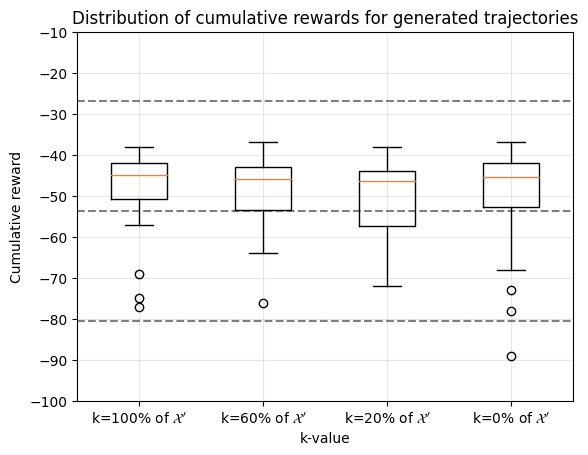

In [22]:
nb_utils.plot_cum_rewards(cum_rewards)
plt.gca().set_ylim([-100, -10])
plt.gca().axhline(y=np.mean(cum_rewards_control[0]), color='black', linestyle='--', alpha=0.5)
plt.gca().axhline(y=np.mean(cum_rewards_control[0]) + np.std(cum_rewards_control[0]), color='black', linestyle='--', alpha=0.5)
plt.gca().axhline(y=np.mean(cum_rewards_control[0]) - np.std(cum_rewards_control[0]), color='black', linestyle='--', alpha=0.5)

In [30]:
test_baseline = 0
test_kvals = [20, 60, 100]

for k in test_kvals:
    print(f"K = {k}")
    res = stats.ttest_ind(cum_rewards_control[test_baseline], cum_rewards[k], equal_var=False)
    print(res)
    if res.pvalue < 0.05:
        print("Significant")
    else:
        print("Not significant")

    print("---" * 4)

K = 20
Ttest_indResult(statistic=0.9310528857737593, pvalue=0.35442589366271626)
Not significant
------------
K = 60
Ttest_indResult(statistic=-0.35163338047089976, pvalue=0.7261278190394945)
Not significant
------------
K = 100
Ttest_indResult(statistic=0.3797532835838839, pvalue=0.7050522036857799)
Not significant
------------


In [24]:
accs_by_k_control = nb_utils.compute_accuracy_by_kval(test_data=test_data, agents=agents_control)

50it [00:01, 29.66it/s]


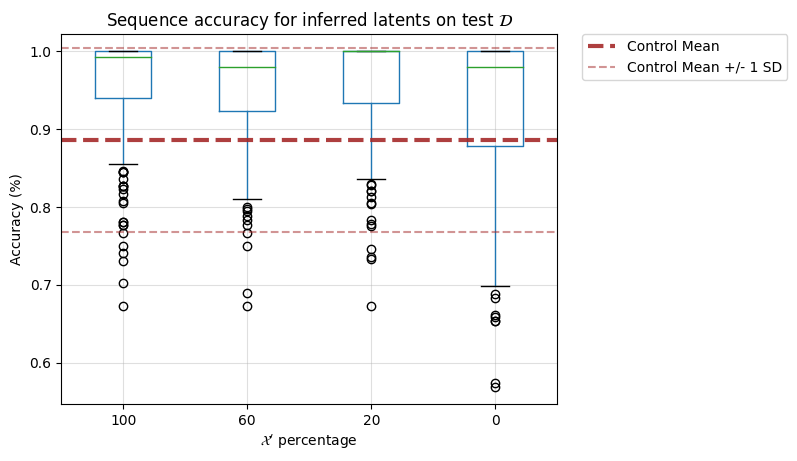

In [25]:
nb_utils.plot_sequence_accuracy_boxplot(accs_by_k)
# add benchmark with control mean
plt.gca().axhline(y=np.mean(accs_by_k_control[0]), color='brown', linestyle='--', alpha=0.9, lw=3, label="Control Mean")
# add standard deviation
plt.gca().axhline(y=np.mean(accs_by_k_control[0]) + np.std(accs_by_k_control[0]), color='brown', linestyle='--', alpha=0.5, label="Control Mean +/- 1 SD")
plt.gca().axhline(y=np.mean(accs_by_k_control[0]) - np.std(accs_by_k_control[0]), color='brown', linestyle='--', alpha=0.5)
plt.gca().grid(alpha=0.4)
plt.gca().legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [26]:
pd.DataFrame(accs_by_k_control).describe()

,0
count,200.000000
mean,0.884898
std,0.118346
min,0.518519
25%,0.822222
50%,0.915254
75%,1.000000
max,1.000000


In [28]:
test_baseline = 0
test_kvals = [20, 60, 100]

for k in test_kvals:
    print(f"K = {k}")
    res = stats.ttest_ind(accs_by_k_control[test_baseline], accs_by_k[k], equal_var=False)
    print(res)
    if res.pvalue < 0.05:
        print("Significant")
    else:
        print("Not significant")

    print("---" * 4)

K = 20
Ttest_indResult(statistic=-7.811998760030269, pvalue=1.0145145515956303e-13)
Significant
------------
K = 60
Ttest_indResult(statistic=-7.241120302111989, pvalue=4.056280954761617e-12)
Significant
------------
K = 100
Ttest_indResult(statistic=-8.138638089101905, pvalue=1.2059877558871793e-14)
Significant
------------


# Visuals for comparing aganist `randomized` benchmark

Remove the `fixed_pi` models from the analysis for now, because there seems to be a bug in the way it is sampling actions from the expert. This is affecting the macro-policy learning.

Compare the learned model using the extra synth trajectories with the `randomized` benchmark.

- Run a hypotehsis test to check significant mean difference between the cumulative rewards of the models
- For same `k` values:
    - plot the **mean cumulative rewards** of the models, with the shaded area showing the standard deviation.
    - plot the **lengths of the trajectories generated** by the models under each regime (`random` and `entropy scoring`)
    - plot the **accuracy for latent prediction** on a test set